In [253]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
#import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [254]:
daily_Data=pd.read_csv("/home/ayush/Documents/machine learning/Medical-Appointmnet/KaggleV2-May-2016.csv")

In [255]:
daily_Data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [256]:
(daily_Data["Gender"] == "F").value_counts()

True     71840
False    38687
Name: Gender, dtype: int64

In [257]:
print('Age:',sorted(daily_Data.Age.unique()))
print('Gender:',daily_Data.Gender.unique())
print("Neighbourhood",daily_Data.Neighbourhood.unique())
print('Scholarship:',daily_Data.Scholarship.unique())
print('Hipertension:',daily_Data.Hipertension.unique())
print('Diabetes:',daily_Data.Diabetes.unique())
print('Alcoholism:',daily_Data.Alcoholism.unique())
print('Handcap:',daily_Data.Handcap.unique())
print('SMS_received:',daily_Data.SMS_received.unique())
#print('No-show:',daily_Data.No-show.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Neighbourhood ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃ

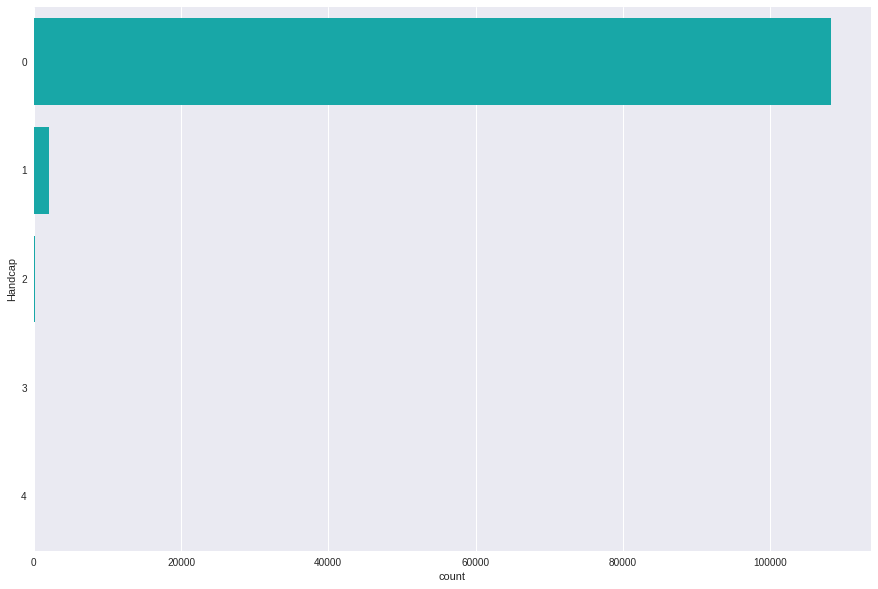

In [258]:
f, ax = plt.subplots(figsize=(15, 10))
sn.countplot(y="Handcap", data=daily_Data, color="c");

In [259]:
from sklearn import preprocessing
#Label Encoding of Gender, Neighbourhood, No-show handcap
le = preprocessing.LabelEncoder()

le.fit(daily_Data["Gender"])
daily_Data["Gender"]=le.transform(daily_Data["Gender"])

#le.fit(daily_Data["Neighbourhood"])
#daily_Data["Neighbourhood"]=le.transform(daily_Data["Neighbourhood"])

le.fit(daily_Data["No-show"])
daily_Data["No-show"]=le.transform(daily_Data["No-show"])

daily_Data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [260]:

print('Age:',sorted(daily_Data.Age.unique()))
print('Gender:',daily_Data.Gender.unique())
print("Neighbourhood",daily_Data.Neighbourhood.unique())
print('Scholarship:',daily_Data.Scholarship.unique())
print('Hipertension:',daily_Data.Hipertension.unique())
print('Diabetes:',daily_Data.Diabetes.unique())
print('Alcoholism:',daily_Data.Alcoholism.unique())
print('Handcap:',daily_Data.Handcap.unique())
print('SMS_received:',daily_Data.SMS_received.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: [0 1]
Neighbourhood ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JO

In [261]:
daily_Data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [262]:
daily_Data["AppointmentDay"].head()

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

In [263]:
#appointment date
#daily_Data["a"] = daily_Data.AppointmentDay.apply(lambda x : x.split("-")[2])
daily_Data["a"] = daily_Data.AppointmentDay.apply(lambda x : x.split("T")[0])

In [264]:
#schedule date
#daily_Data["s"]=daily_Data.ScheduledDay.apply(lambda x : x.split("-")[2])
daily_Data["s"] = daily_Data.ScheduledDay.apply(lambda x : x.split("T")[0])

In [265]:
#object to integer
#daily_Data['a']=pd.to_numeric(daily_Data['a'])
#daily_Data['s']=pd.to_numeric(daily_Data['s'])

In [266]:
#taking month
#daily_Data["a1"]=daily_Data["AppointmentDay"].apply(lambda x: x.split("-")[1])
#daily_Data["s1"]=daily_Data["ScheduledDay"].apply(lambda x: x.split("-")[1])

In [267]:
#daily_Data["a0"]=daily_Data["AppointmentDay"].apply(lambda x: x.split("-")[0])
#daily_Data["s0"]=daily_Data["ScheduledDay"].apply(lambda x: x.split("-")[0])

In [268]:
##object to integer
#daily_Data['a1']=pd.to_numeric(daily_Data['a1'])
#daily_Data['s1']=pd.to_numeric(daily_Data['s1'])

In [269]:
#daily_Data['a0']=pd.to_numeric(daily_Data['a0'])
#daily_Data['s0']=pd.to_numeric(daily_Data['s0'])

In [270]:
daily_Data.dtypes

PatientId         float64
AppointmentID       int64
Gender              int64
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show             int64
a                  object
s                  object
dtype: object

In [271]:
#daily_Data["interval"]=(daily_Data["a0"]-daily_Data["s0"])*365+(daily_Data["a1"]-daily_Data["s1"])*30+daily_Data["a"]-daily_Data["s"]

In [272]:
#daily_Data["interval"]

In [273]:
daily_Data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,a,s
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29


In [274]:
#removing negative interval values
#daily_Data.drop(daily_Data[daily_Data.interval < 0].index, inplace=True)

In [275]:
#daily_Data=daily_Data.drop(["a","s","a1","s1","AppointmentDay","ScheduledDay","a0","s0"],axis=1)

In [276]:
daily_Data['Age'][(daily_Data['Age']<=25)]=0
daily_Data['Age'][(daily_Data['Age']>25) & (daily_Data['Age']<=65)]=1
daily_Data['Age'][(daily_Data['Age']>65)]=2
#daily_Data=daily_Data.drop("Age",axis=1)


In [277]:
daily_Data.Age.unique()

array([1, 0, 2])

In [278]:
daily_Data['a'] = pd.to_datetime(daily_Data['a'])
daily_Data['s'] = pd.to_datetime(daily_Data['s'])

daily_Data['Days'] = (daily_Data.a - daily_Data.s)/ np.timedelta64(1, 'D')  # if already datetime64 you don't need to use to_datetime


#daily_Data["c"]=daily_Data['a'] - daily_Data['s']

#df['C'] = df['A'] - df['B']

print(daily_Data.head())

      PatientId  AppointmentID  Gender          ScheduledDay  \
0  2.987250e+13        5642903       0  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503       1  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549       0  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828       0  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494       0  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z    1    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z    1    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z    1      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    0  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z    1    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received  No-show          a          s  \
0         0           0        0             0        0 2016-04-2

In [279]:
print(sorted(daily_Data.Days.unique()))

[-6.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 101.0, 102.0, 103.0, 104.0, 105.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 115.0, 117.0, 119.0, 122.0, 123.0, 125.0, 126.0, 127.0, 132.0, 133.0, 139.0, 142.0, 146.0, 151.0, 155.0, 162.0, 169.0, 176.0, 179.0]


In [280]:
daily_Data.drop(daily_Data[daily_Data.Days < 0].index, inplace=True)

In [281]:
daily_Data.drop(daily_Data[daily_Data.Age < 0].index, inplace=True)

In [282]:
daily_Data=daily_Data.drop(["a","s","AppointmentDay","ScheduledDay","PatientId","AppointmentID"],axis=1)

In [283]:
daily_Data.reset_index()
daily_Data.index.name="Index"
daily_Data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days
Index,,,,,,,,,,,
0,0,1,JARDIM DA PENHA,0,1,0,0,0,0,0,0.0
1,1,1,JARDIM DA PENHA,0,0,0,0,0,0,0,0.0
2,0,1,MATA DA PRAIA,0,0,0,0,0,0,0,0.0
3,0,0,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0.0
4,0,1,JARDIM DA PENHA,0,1,1,0,0,0,0,0.0


In [284]:
print('Age:',sorted(daily_Data.Age.unique()))
print('Gender:',daily_Data.Gender.unique())
print("Neighbourhood",sorted(daily_Data.Neighbourhood.unique()))
print('Scholarship:',daily_Data.Scholarship.unique())
print('Hipertension:',daily_Data.Hipertension.unique())
print('Diabetes:',daily_Data.Diabetes.unique())
print('Alcoholism:',daily_Data.Alcoholism.unique())
print('Handcap:',daily_Data.Handcap.unique())
print('SMS_received:',daily_Data.SMS_received.unique())

Age: [0, 1, 2]
Gender: [0 1]
Neighbourhood ['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC', 'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ', 'REDENÇÃO', 'REPÚBLICA', 'RESISTÊNCIA', 'ROMÃO', 'SANTA CECÍ

In [285]:
daily_Data.shape

(110522, 11)

In [286]:
"""
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)
columns=['Neighbourhood']
for col in columns:
       enc.fit(daily_Data)
       temp = enc.transform(daily_Data[col])
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in daily_Data[col].value_counts().index])
       temp=temp.set_index(daily_Data.index.values)
       daily_Data1=pd.concat([daily_Data,temp],axis=1)
"""

'\nfrom sklearn.preprocessing import OneHotEncoder\nenc=OneHotEncoder(sparse=False)\ncolumns=[\'Neighbourhood\']\nfor col in columns:\n       enc.fit(daily_Data)\n       temp = enc.transform(daily_Data[col])\n       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in daily_Data[col].value_counts().index])\n       temp=temp.set_index(daily_Data.index.values)\n       daily_Data1=pd.concat([daily_Data,temp],axis=1)\n'

In [287]:
daily_Data.shape
#daily_Data[daily_Data["Gender"]==np.nan]

(110522, 11)

In [288]:
daily_Data.Handcap.unique()
print(daily_Data.head())
print('Age:',sorted(daily_Data.Age.unique()))
print('Gender:',daily_Data.Gender.unique())
print("Neighbourhood",daily_Data.Neighbourhood.unique())
print('Scholarship:',daily_Data.Scholarship.unique())
print('Hipertension:',daily_Data.Hipertension.unique())
print('Diabetes:',daily_Data.Diabetes.unique())
print('Alcoholism:',daily_Data.Alcoholism.unique())
print('Handcap:',daily_Data.Handcap.unique())
print('SMS_received:',daily_Data.SMS_received.unique())

       Gender  Age      Neighbourhood  Scholarship  Hipertension  Diabetes  \
Index                                                                        
0           0    1    JARDIM DA PENHA            0             1         0   
1           1    1    JARDIM DA PENHA            0             0         0   
2           0    1      MATA DA PRAIA            0             0         0   
3           0    0  PONTAL DE CAMBURI            0             0         0   
4           0    1    JARDIM DA PENHA            0             1         1   

       Alcoholism  Handcap  SMS_received  No-show  Days  
Index                                                    
0               0        0             0        0   0.0  
1               0        0             0        0   0.0  
2               0        0             0        0   0.0  
3               0        0             0        0   0.0  
4               0        0             0        0   0.0  
Age: [0, 1, 2]
Gender: [0 1]
Neighbourhood ['JA

In [289]:
Neighbour=pd.get_dummies(daily_Data['Neighbourhood'])

In [290]:
daily_Data=pd.concat([daily_Data,Neighbour],axis=1)

In [291]:
daily_Data.shape

(110522, 92)

In [292]:
handcap=pd.get_dummies(daily_Data['Handcap'])
daily_Data=pd.concat([daily_Data,handcap],axis=1)

In [293]:
daily_Data.shape

(110522, 97)

In [294]:
Age=pd.get_dummies(daily_Data['Age'])
daily_Data=pd.concat([daily_Data,Age],axis=1)

In [295]:
daily_Data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,...,UNIVERSITÁRIO,VILA RUBIM,0,1,2,3,4,0,1,2
Index,,,,,,,,,,,,,,,,,,,,,
0,0,1,JARDIM DA PENHA,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,1,JARDIM DA PENHA,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,MATA DA PRAIA,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,PONTAL DE CAMBURI,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,JARDIM DA PENHA,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [296]:
daily_Data=daily_Data.drop("Neighbourhood",axis=1)
#daily_Data=daily_Data.drop("PatientId",axis=1)
daily_Data=daily_Data.drop("Handcap",axis=1)
#daily_Data=daily_Data.drop("AppointmentID",axis=1)
daily_Data=daily_Data.drop("Age",axis=1)

In [297]:
daily_Data.shape

(110522, 97)

In [298]:
#daily_Data.reset_index()
daily_Data.head()


,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,Days,AEROPORTO,ANDORINHAS,...,UNIVERSITÁRIO,VILA RUBIM,0,1,2,3,4,0,1,2
Index,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [299]:
daily_Data.columns


Index([                     'Gender',                 'Scholarship',
                      'Hipertension',                    'Diabetes',
                        'Alcoholism',                'SMS_received',
                           'No-show',                        'Days',
                         'AEROPORTO',                  'ANDORINHAS',
                   'ANTÔNIO HONÓRIO',         'ARIOVALDO FAVALESSA',
                    'BARRO VERMELHO',                  'BELA VISTA',
                    'BENTO FERREIRA',                   'BOA VISTA',
                            'BONFIM',                   'CARATOÍRA',
                            'CENTRO',                     'COMDUSA',
                         'CONQUISTA',                  'CONSOLAÇÃO',
                        'CRUZAMENTO',                    'DA PENHA',
                        'DE LOURDES',                   'DO CABRAL',
                        'DO MOSCOSO',                   'DO QUADRO',
                    'ENSEADA DO SU

In [300]:
daily_Data.head()

,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,Days,AEROPORTO,ANDORINHAS,...,UNIVERSITÁRIO,VILA RUBIM,0,1,2,3,4,0,1,2
Index,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [301]:
a=(daily_Data["Gender"] == 1).value_counts()

In [302]:
a

False    71837
True     38685
Name: Gender, dtype: int64

In [303]:
#[daily_Data["Handcap"] == 0].value_counts()

In [304]:
daily_Data["No-show"][daily_Data["Gender"] == 0].value_counts()

0    57246
1    14591
Name: No-show, dtype: int64

In [305]:
daily_Data["No-show"][daily_Data["Gender"] == 1].value_counts()

0    30962
1     7723
Name: No-show, dtype: int64

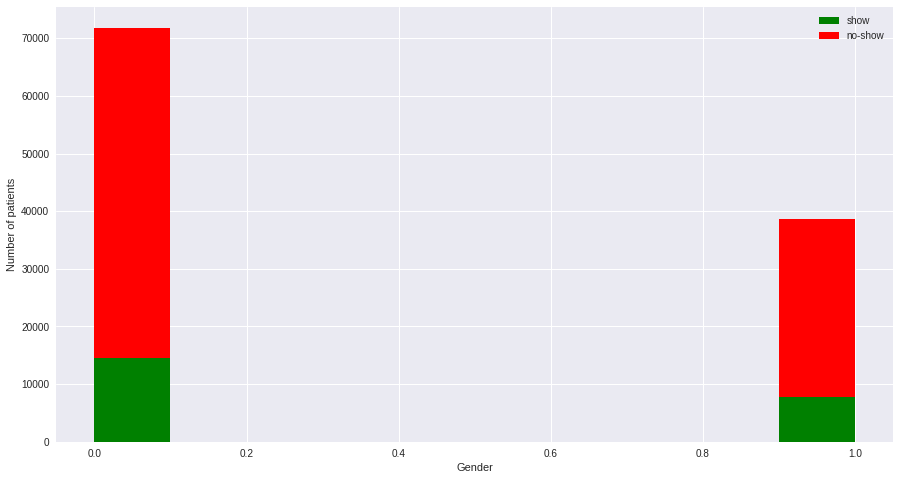

In [306]:
figure = plt.figure(figsize=(15,8))
plt.hist([daily_Data[daily_Data['No-show']==1]['Gender'], daily_Data[daily_Data['No-show']==0]['Gender']], stacked=True, color = ['g','r'],label = ['show','no-show'])
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.legend()

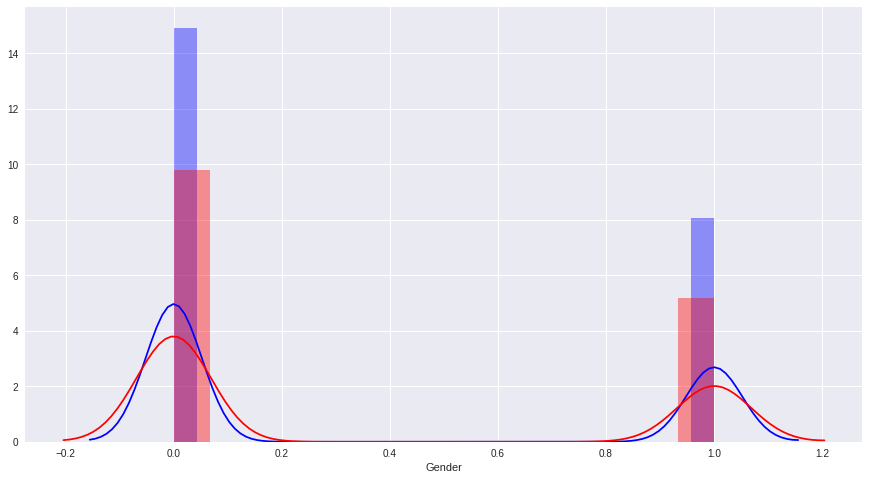

In [307]:
figure = plt.figure(figsize=(15,8))
sn.distplot(daily_Data[daily_Data['No-show'] == 0]['Gender'],color='b')
sn.distplot(daily_Data[daily_Data['No-show'] == 1]['Gender'],color='r')


In [308]:
daily_Data["Days"].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Days, dtype: float64

In [309]:
print(sorted(daily_Data.Days.unique()))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 101.0, 102.0, 103.0, 104.0, 105.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 115.0, 117.0, 119.0, 122.0, 123.0, 125.0, 126.0, 127.0, 132.0, 133.0, 139.0, 142.0, 146.0, 151.0, 155.0, 162.0, 169.0, 176.0, 179.0]


In [310]:
daily_Data.head()

,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,Days,AEROPORTO,ANDORINHAS,...,UNIVERSITÁRIO,VILA RUBIM,0,1,2,3,4,0,1,2
Index,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [311]:
labels=daily_Data.pop("No-show")

In [312]:
labels.shape

(110522,)

In [313]:
from imblearn.over_sampling import SMOTE

df_new,lab_new=SMOTE(random_state=3).fit_sample(daily_Data,labels)
df_new=pd.DataFrame(df_new)
lab_new=pd.DataFrame(lab_new)

In [314]:
lab_new[0].value_counts()

1    88208
0    88208
Name: 0, dtype: int64

In [323]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new, lab_new, test_size=0.30, random_state=42)

In [330]:
from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(max_depth=2, random_state=42)
clf = RandomForestClassifier(n_estimators=100,max_depth=100,min_samples_split=50,min_samples_leaf=100)
clf=clf.fit(X_train, y_train)
feat=(clf.feature_importances_)
pred=clf.predict(X_test)
print(pred)

from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(feat)

/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[1 1 0 ..., 1 1 0]
0.70259801606
[  4.74584378e-02   2.29339602e-02   5.05104402e-02   2.10438440e-02
   8.64425780e-03   1.73540731e-01   5.61340824e-01   0.00000000e+00
   2.02685124e-03   2.50472398e-05   3.57809791e-05   1.96356035e-05
   2.00241246e-03   5.08011288e-04   2.99511373e-05   6.79010298e-04
   1.95697676e-03   1.74920727e-03   0.00000000e+00   2.32961999e-04
   6.31166229e-04   6.23910797e-04   5.12063198e-04   0.00000000e+00
   2.03489566e-04   1.52339539e-05   1.50924316e-03   0.00000000e+00
   1.42181987e-05   6.36246514e-05   6.71229016e-04   0.00000000e+00
   3.05454186e-04   1.79614927e-04   1.46989669e-03   0.00000000e+00
   7.17173688e-04   9.64451323e-04   0.00000000e+00   0.00000000e+00
   2.49075114e-03   0.00000000e+00   2.28510905e-04   9.43374896e-03
   1.52260032e-03   1.47099617e-03   2.94555541e-03   4.06365945e-03
   9.18637473e-04   3.68556454e-04   2.80218471e-03   6.38823212e-04
   1.60833820e-04   4.99332214e-04   0.00000000e+00   2.44625822e-04
 

(array([ 90.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.        ,  0.01871136,  0.03742272,  0.05613408,  0.07484544,
         0.0935568 ,  0.11226816,  0.13097953,  0.14969089,  0.16840225,
         0.18711361,  0.20582497,  0.22453633,  0.24324769,  0.26195905,
         0.28067041,  0.29938177,  0.31809313,  0.33680449,  0.35551586,
         0.37422722,  0.39293858,  0.41164994,  0.4303613 ,  0.44907266,
         0.46778402,  0.48649538,  0.50520674,  0.5239181 ,  0.54262946,
         0.56134082]),
 <a list of 30 Patch objects>)

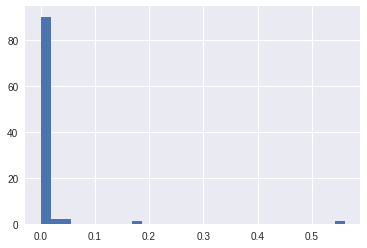

In [331]:
plt.hist(feat,bins=30,)

In [332]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test,pred)
accuracy

0.7025980160604629

In [333]:
f1=f1_score(y_test,pred)
print(f1)

0.734704196865


In [334]:
f0=f1_score(y_test,pred, average='macro')  
f1=f1_score(y_test,pred, average='micro')  
f2=f1_score(y_test,pred, average='weighted')  
f3=f1_score(y_test,pred, average=None)
f4=f1_score(y_test,pred, average='binary')
print(f0,f1,f2,f3,f4)

0.698177549851 0.70259801606 0.698371484434 [ 0.6616509  0.7347042] 0.734704196865


In [335]:
df_new.shape

(176416, 96)